In [57]:
#functions to manipulate graphlets and identify them

import graph_tool as gt
import numpy as np
import graph_tool.generation as gtg
import random
import graph_tool.draw as gtd
import graph_tool.spectral as gts

def random_adj(nb_nodes): 
    """returns an adjancency matrices of nb_nodes each"""
    A = np.random.randint(0,2, size = nb_nodes**2).reshape(nb_nodes,nb_nodes)
    np.fill_diagonal(A, 0)
    for i in range(nb_nodes):
        for j in range(nb_nodes):
            A[i,j] = A[j,i]
    return A

def random_n_adj(nb_nodes, n): 
    """returns n adjancency matrices of nb_nodes each"""
    n_A = [random_adj(nb_nodes) for i in range(n)]
    return n_A

def generate_graphlet(nb_nodes): #PROBLEM generate multi-edge graphs whereas I want no multi-edge..
    """generate graphlet object G from nb_nodes"""
    """undirected, no parrallel_edges edges, max degree is 3"""
    def deg(): #degree distribution is imposed here, in contradiction with parrallel_edges property imposed as well
        if nb_nodes == 2:
            array = np.array([int(random.random()*1.5) for i in range(nb_nodes)])
        if nb_nodes == 3:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        if nb_nodes == 4:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        if nb_nodes == 5:
            array = np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
        return array
                #np.array([int(random.random()*(nb_nodes/2)+1) for i in range(nb_nodes)])
                #np.array([int(random.random()*1.5+1) for i in range(nb_nodes)])
    G = gtg.random_graph(nb_nodes, deg, parallel_edges = False)
    G.set_directed(False)
    #gtd.graph_draw(G, output_size = (50,50))
    #A = gts.adjacency(G).todense()
    return G

def generate_n_graphlets(nb_nodes,many):
    """generate np_nodes-nodes graph_tool graphlets many-time objects, return the list array of objects"""
    many_graphlets = np.array([generate_graphlet(nb_nodes) for i in range(many)], dtype = object)
    return(many_graphlets)

def generate_2345_graphlets(n):
    """generate 4*n 2,3,4,5-node graphlets, return then in array of objects"""
    array_2345_graphs = np.concatenate([generate_n_graphlets(n,i) for i in range(2,6)])
    return array_2345_graphs

def P(G : gt.Graph()):
    """for given G, gives profile vector P of 5 elements"""
    V = len(tuple(G.vertices()))
    E = len(tuple(G.edges()))
    deg_dist = np.array([v.in_degree() + v.out_degree() for v in G.vertices()]) #if return it, P depends variant of numerotation
    min_deg = deg_dist.min()
    max_deg = deg_dist.max()
    total_deg = deg_dist.sum()
    #we will should not forget that for same graph G deg_dist depends on G nodes' numerotation
    #on the other hand, first five indicators are independant of G nodes' numerotation
    gtd.graph_draw(G, output_size = (50,50))
    return(np.array([V,E,min_deg,max_deg, total_deg]))

def T(array : np.array):
    """for given profile vector P, return print identified graphlet"""
    V = array[0]
    E = array[1]
    min_deg = array[2]
    max_deg = array[3]
    total_deg = array[4]
    autre = 1
    if V == 2 and E == 1:
        bingo = 'G0'
        autre = 0
    if V == 3 and E == 2:
        bingo = 'G1'
        autre = 0
    if V == 3 and E == 3:
        bingo = 'G2'
        autre = 0
    if V == 4 and E == 3 and max_deg == 3: #not sure if these are the only three necessary conditions to identify G4
        bingo = 'G4'
        autre = 0
    if V == 4 and E == 4 and min_deg == 3 and max_deg == 3:
        bingo = 'G6'
        autre = 0
    if V == 4 and E == 5 and min_deg == 2 and max_deg == 3:
        bingo = 'G7'
        autre = 0
    if V == 4 and E == 6:
        bingo = 'G9'
        autre = 0
    if V == 5 and E == 6 and min_deg == 2 and max_deg == 3:
        bingo = 'G21'
        autre = 0
    if autre == 1:
        bingo = "unidentified graph"
    print(bingo)
    return(bingo)

def percentage_identified(n):
    """generate n sample of each k-node graphlet for k=2,3,4,5, identify them, show percentage of identified"""
    #n samples of each k-graphlet
    win = []
    for i in range(len(generate_2345_graphlets(n))):
        if T(P(generate_2345_graphlets(n)[i])) != "unidentified graph":
            win.append(1)
    print(int(np.array(win).sum()/len(generate_2345_graphlets(n))*100), "%")
    return(int(np.array(win).sum()/len(generate_2345_graphlets(n))*100))

In [58]:
#given integers k number of nodes, and n number of graphs, returns array of n adjacency matrices of k node graphlets
random_n_adj(3,2)

[array([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]]),
 array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]])]

In [59]:
#given integers k number of node, and n number of graphs, returns array of n graph_tool graphs of k nodes
generate_n_graphlets(3, 2)

array([<Graph object, undirected, with 3 vertices and 4 edges at 0x10e4ed460>,
       <Graph object, undirected, with 3 vertices and 3 edges at 0x1647f87f0>],
      dtype=object)

In [60]:
#given integer k number of nodes, generate a graph_tool graphlet of k nodes and return it
G = generate_graphlet(4) 

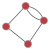

array([ 4,  5,  2,  3, 10])

In [61]:
#given graph_tool graph, returns 5 integers that are the graphlet's profile characteristics

P(G)

In [62]:
#T returns graphlet name, given graphlet's profile characteristics
T(np.array([ 5,  7,  2,  3, 14]))

unidentified graph


'unidentified graph'

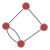

G7


'G7'

In [63]:
#given graph_tool graph, returns graphlet name  
T(P(G))

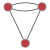

unidentified graph


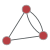

unidentified graph


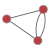

unidentified graph


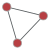

G2


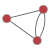

unidentified graph


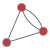

unidentified graph


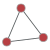

G2


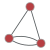

unidentified graph


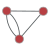

unidentified graph


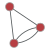

unidentified graph


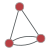

unidentified graph


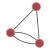

unidentified graph


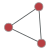

G2


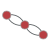

unidentified graph
21 %


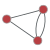

unidentified graph


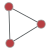

G2


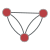

unidentified graph


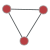

G2


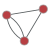

unidentified graph


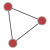

G2


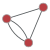

unidentified graph


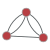

unidentified graph


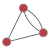

unidentified graph


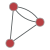

unidentified graph


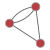

unidentified graph


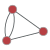

unidentified graph


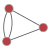

unidentified graph


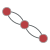

unidentified graph
21 %
mean percentage of identified graphlets 21.0
duration is =  1 s


In [74]:
#generate a lot of graphlets k node graphlets, identify them, return percentage identified 
import time

k = 3

s = time.time()
moyenne = []
for i in range(2):
    moyenne.append(percentage_identified(k))
    
print("mean percentage of identified graphlets",np.array(moyenne).mean())
print("duration is = ",int(time.time()-s),"s")